# SIR epidemic model simulations

In [14]:
import numpy as np
import matplotlib.pyplot as plt

Simulation functions:

In [15]:
def RK4_step(f, y, t, dt, *args): #it performs a single RK4 step

    #f=function representing the ODE system (SIR equations in our case)
    #y=current state [S, I, R]
    #t=current time
    #dt=time step
    #args=additional parameters for f (beta and gamma in our case)
    #returns y_next=tate at the next time step

    k1 = f(y, t, *args)
    k2 = f(y + 0.5 * dt * k1, t + 0.5 * dt, *args)
    k3 = f(y + 0.5 * dt * k2, t + 0.5 * dt, *args)
    k4 = f(y + dt * k3, t + dt, *args)

    return y + (dt / 6) * (k1 + 2*k2 + 2*k3 + k4)  # (k=slopes)

def SIR_model(y, t, beta, gamma): #it defines the SIR ODE system
    S, I, R = y #S=susceptible individuals, I=infected individuals, R=recovered individuals
    N = S + I + R #total population
    #equations:
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return np.array([dSdt, dIdt, dRdt])


def SIR_simulation(S0, I0, R0, beta, gamma, t_max, dt):

    n_steps = int(t_max / dt)
    t = np.linspace(0, t_max, n_steps)

    y = np.array([S0, I0, R0])
    solution = np.zeros((n_steps, 3))
    solution[0] = y

    # integrate using RK4
    for i in range(1, n_steps):
        y = RK4_step(SIR_model, y, t[i - 1], dt, beta, gamma)
        solution[i] = y

    S, I, R = solution.T

    return S, I, R, t #returns 4 lists with n_steps values

Simulation with alpha = 0.1 and beta = 0.3:

Max number of infected individuals: I = 303.81
Time when infected individuals are maximum: 26.63 days
Susceptible and Recovered when infected is maximum: S = 333.41, R = 362.78
Final values after the simulation: S = 59.13, I = 1.55, R = 939.32


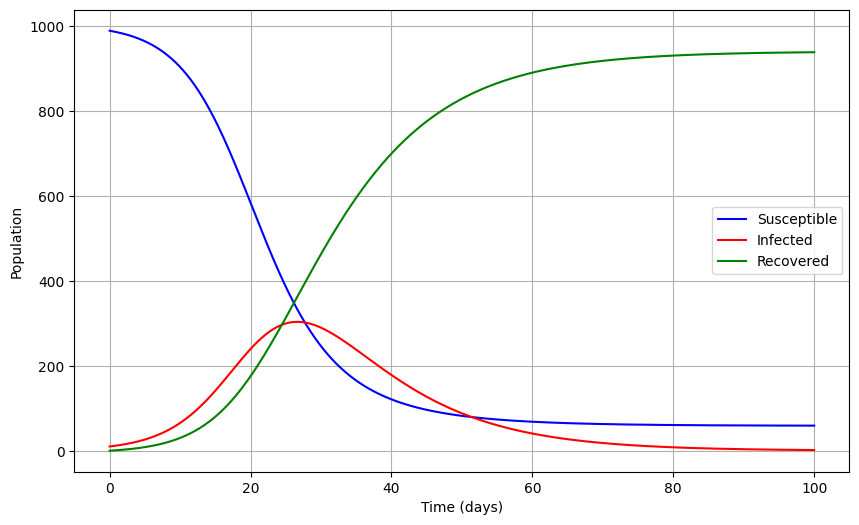

In [16]:
# simulation parameters
S0, I0, R0 = 990, 10, 0 # 1000 people, 10 initially infected
beta, gamma = 0.3, 0.1
t_max, dt = 100, 0.01 # 100 days, steps = 2.4 hours

# simulation
S, I, R, t = SIR_simulation(S0, I0, R0, beta, gamma, t_max, dt)

# maximum number of infected individuals and the time it occurs
max_infected = np.max(I)
time_max_infected = t[np.argmax(I)]

# values of S and R when I is at its maximum
S_at_max_I = S[np.argmax(I)]
R_at_max_I = R[np.argmax(I)]

# print results
print(f"Max number of infected individuals: I = {max_infected:.2f}")
print(f"Time when infected individuals are maximum: {time_max_infected:.2f} days")
print(f"Susceptible and Recovered when infected is maximum: S = {S_at_max_I:.2f}, R = {R_at_max_I:.2f}")
print(f"Final values after the simulation: S = {S[-1]:.2f}, I = {I[-1]:.2f}, R = {R[-1]:.2f}")

# plot results
plt.figure(figsize=(10, 6))
plt.plot(t, S, label='Susceptible', color='blue')
plt.plot(t, I, label='Infected', color='red')
plt.plot(t, R, label='Recovered', color='green')
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.legend()
plt.grid()
plt.show()

Simulation with: alpha = 0.1 and beta = 0.9:

Max number of infected individuals: I = 645.87
Time when infected individuals are maximum: 8.57 days
Susceptible and Recovered when infected is maximum: S = 111.14, R = 242.99
Final values after the simulation: S = 0.12, I = 0.08, R = 999.79


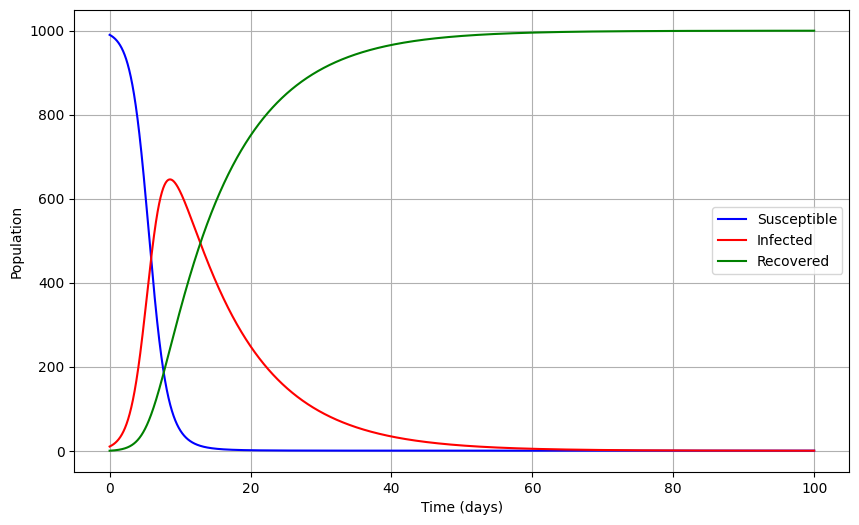

In [17]:
# simulation parameters
S0, I0, R0 = 990, 10, 0 # 1000 people, 10 initially infected
beta, gamma = 0.9, 0.1
t_max, dt = 100, 0.01 # 100 days, steps = 2.4 hours

# simulation
S, I, R, t = SIR_simulation(S0, I0, R0, beta, gamma, t_max, dt)

# maximum number of infected individuals and the time it occurs
max_infected = np.max(I)
time_max_infected = t[np.argmax(I)]

# values of S and R when I is at its maximum
S_at_max_I = S[np.argmax(I)]
R_at_max_I = R[np.argmax(I)]

# print results
print(f"Max number of infected individuals: I = {max_infected:.2f}")
print(f"Time when infected individuals are maximum: {time_max_infected:.2f} days")
print(f"Susceptible and Recovered when infected is maximum: S = {S_at_max_I:.2f}, R = {R_at_max_I:.2f}")
print(f"Final values after the simulation: S = {S[-1]:.2f}, I = {I[-1]:.2f}, R = {R[-1]:.2f}")

# plot results
plt.figure(figsize=(10, 6))
plt.plot(t, S, label='Susceptible', color='blue')
plt.plot(t, I, label='Infected', color='red')
plt.plot(t, R, label='Recovered', color='green')
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.legend()
plt.grid()
plt.show()

Simulation with alpha = 0.1 and beta = 0.2:

Max number of infected individuals: I = 158.45
Time when infected individuals are maximum: 43.79 days
Susceptible and Recovered when infected is maximum: S = 499.96, R = 341.59
Final values after the simulation: S = 209.84, I = 14.48, R = 775.68


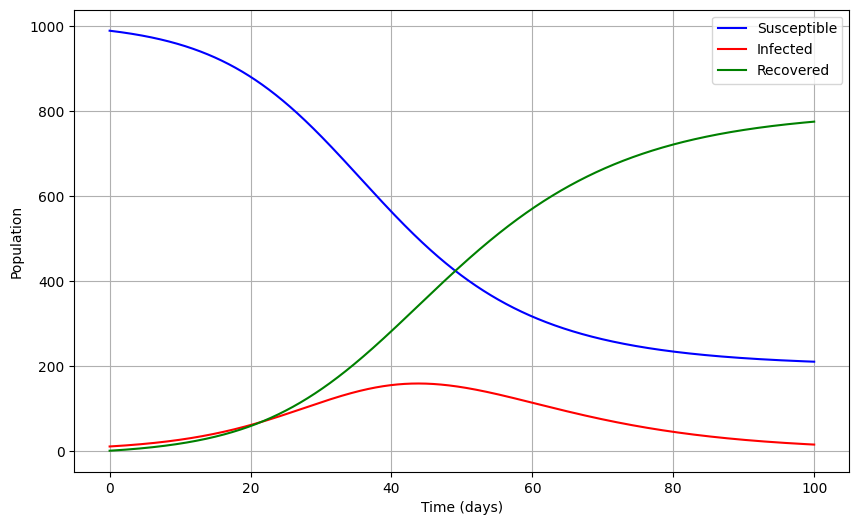

In [18]:
# simulation parameters
S0, I0, R0 = 990, 10, 0 # 1000 people, 10 initially infected
beta, gamma = 0.2, 0.1
t_max, dt = 100, 0.01 # 100 days, steps = 2.4 hours

# simulation
S, I, R, t = SIR_simulation(S0, I0, R0, beta, gamma, t_max, dt)

# maximum number of infected individuals and the time it occurs
max_infected = np.max(I)
time_max_infected = t[np.argmax(I)]

# values of S and R when I is at its maximum
S_at_max_I = S[np.argmax(I)]
R_at_max_I = R[np.argmax(I)]

# print results
print(f"Max number of infected individuals: I = {max_infected:.2f}")
print(f"Time when infected individuals are maximum: {time_max_infected:.2f} days")
print(f"Susceptible and Recovered when infected is maximum: S = {S_at_max_I:.2f}, R = {R_at_max_I:.2f}")
print(f"Final values after the simulation: S = {S[-1]:.2f}, I = {I[-1]:.2f}, R = {R[-1]:.2f}")

# plot results
plt.figure(figsize=(10, 6))
plt.plot(t, S, label='Susceptible', color='blue')
plt.plot(t, I, label='Infected', color='red')
plt.plot(t, R, label='Recovered', color='green')
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.legend()
plt.grid()
plt.show()

## Sensitivity analysis

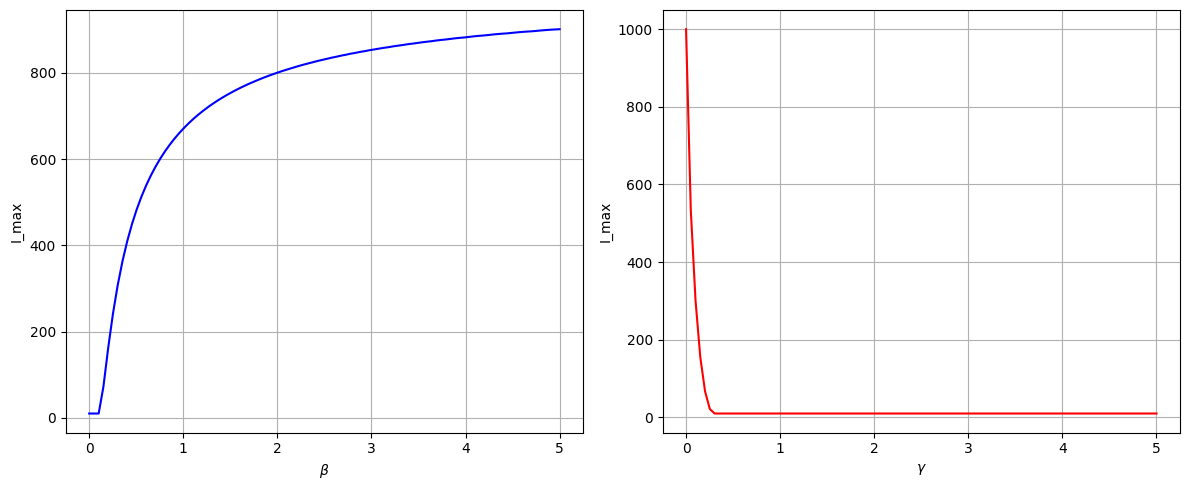

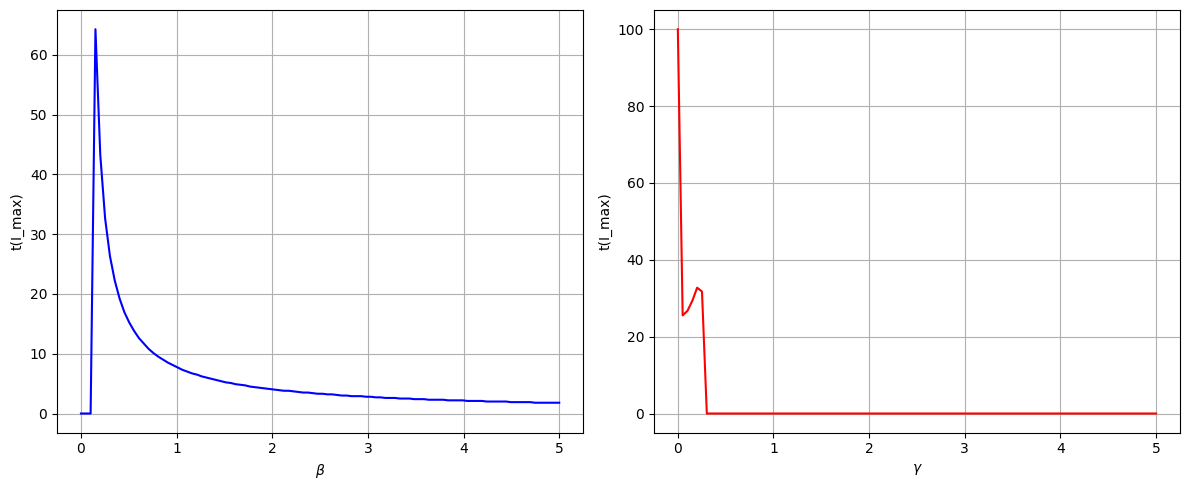

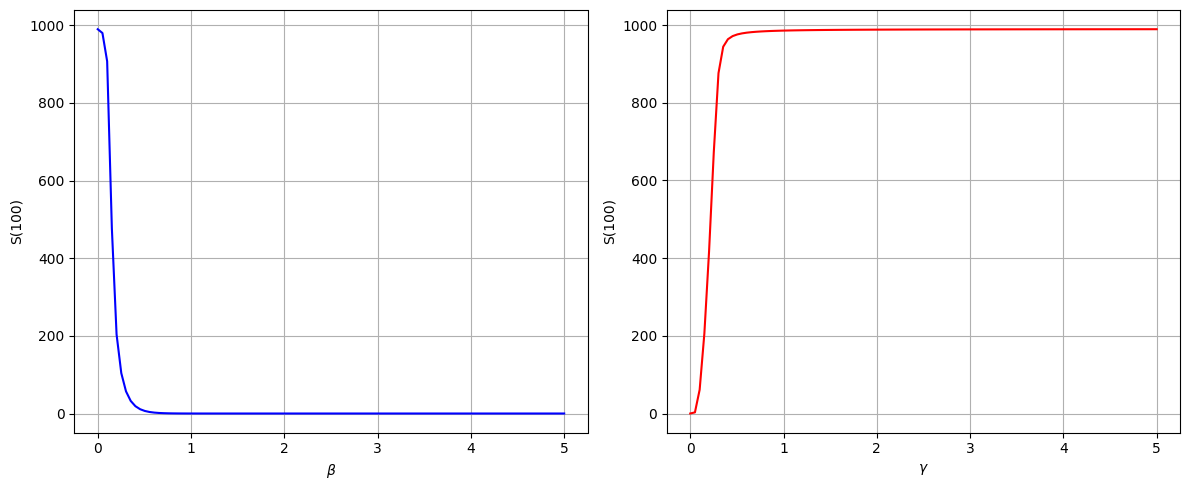

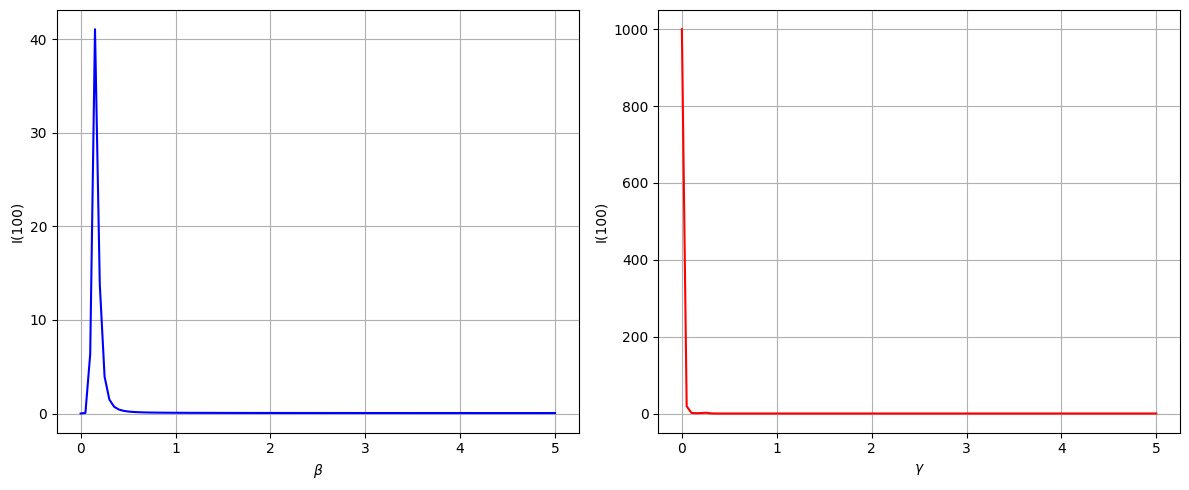

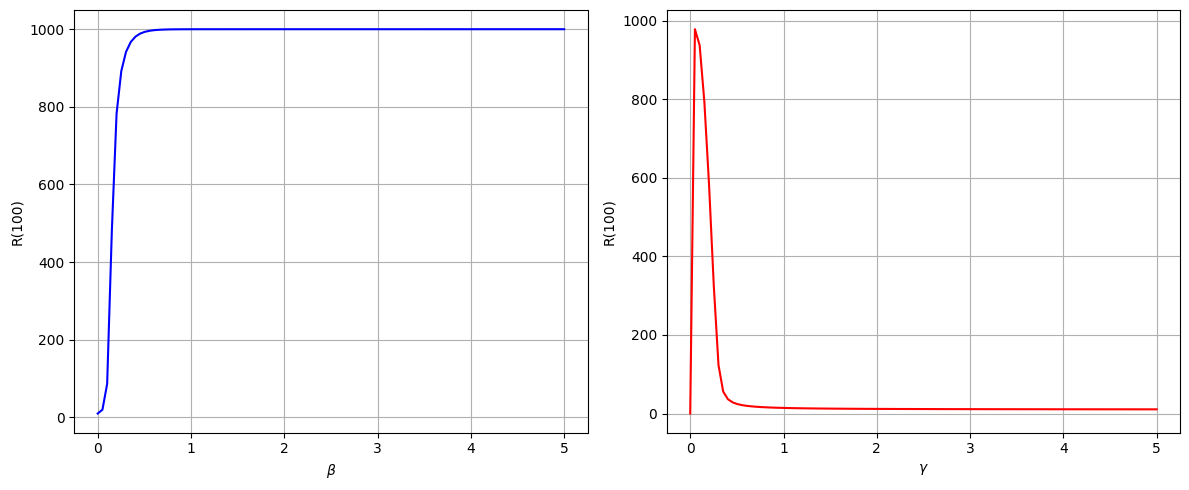

In [19]:
# sensitivity analysis for gamma keeping beta fixed
beta_fixed = 0.3
gamma_values = np.linspace(0, 5, 100)  # 100 values from 0 to 5
I_max_gamma = []
t_I_max_gamma = []
S_final_gamma = []
I_final_gamma = []
R_final_gamma = []

for gamma in gamma_values:
    S, I, R, t = SIR_simulation(990, 10, 0, beta_fixed, gamma, 100, 0.1)
    I_max_gamma.append(np.max(I))
    t_I_max_gamma.append(t[np.argmax(I)])
    S_final_gamma.append(S[-1])
    I_final_gamma.append(I[-1])
    R_final_gamma.append(R[-1])

# sensitivity analysis for beta keeping gamma fixed
gamma_fixed = 0.1
beta_values = np.linspace(0, 5, 100)  # 100 values from 0 to 5
I_max_beta = []
t_I_max_beta = []
S_final_beta = []
I_final_beta = []
R_final_beta = []

for beta in beta_values:
    S, I, R, t = SIR_simulation(990, 10, 0, beta, gamma_fixed, 100, 0.1)
    I_max_beta.append(np.max(I))
    t_I_max_beta.append(t[np.argmax(I)])
    S_final_beta.append(S[-1])
    I_final_beta.append(I[-1])
    R_final_beta.append(R[-1])

# plot results

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2) # varying gamma
plt.plot(gamma_values, I_max_gamma, color='red')
plt.xlabel(r'$\gamma$')
plt.ylabel('I_max')
plt.grid()
plt.subplot(1, 2, 1) # varying beta
plt.plot(beta_values, I_max_beta, color='blue')
plt.xlabel(r'$\beta$')
plt.ylabel('I_max')
plt.grid()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)# varying gamma
plt.plot(gamma_values, t_I_max_gamma, color='red')
plt.xlabel(r'$\gamma$')
plt.ylabel('t(I_max)')
plt.grid()
plt.subplot(1, 2, 1) # varying beta
plt.plot(beta_values, t_I_max_beta, color='blue')
plt.xlabel(r'$\beta$')
plt.ylabel('t(I_max)')
plt.grid()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)# varying gamma
plt.plot(gamma_values, S_final_gamma, color='red')
plt.xlabel(r'$\gamma$')
plt.ylabel('S(100)')
plt.grid()
plt.subplot(1, 2, 1) # varying beta
plt.plot(beta_values, S_final_beta, color='blue')
plt.xlabel(r'$\beta$')
plt.ylabel('S(100)')
plt.grid()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)# varying gamma
plt.plot(gamma_values, I_final_gamma, color='red')
plt.xlabel(r'$\gamma$')
plt.ylabel('I(100)')
plt.grid()
plt.subplot(1, 2, 1)# varying beta
plt.plot(beta_values, I_final_beta, color='blue')
plt.xlabel(r'$\beta$')
plt.ylabel('I(100)')
plt.grid()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)# varying gamma
plt.plot(gamma_values, R_final_gamma, color='red')
plt.xlabel(r'$\gamma$')
plt.ylabel('R(100)')
plt.grid()
plt.subplot(1, 2, 1)# varying beta
plt.plot(beta_values, R_final_beta, color='blue')
plt.xlabel(r'$\beta$')
plt.ylabel('R(100)')
plt.grid()
plt.tight_layout()
plt.show()

## A measure of sensitivity

In [20]:
# sensitivity analysis function
def compute_sensitivity(parameter_values, param_name, delta_p, fixed_value, fixed_name):
    sensitivities = []

    for p in parameter_values:
        
        # compute Y(p)
        S, I, R, t = SIR_simulation(990, 10, 0, p if param_name == 'beta' else fixed_value, fixed_value if param_name == 'beta' else p, 100, 0.1)
        Y_p = np.max(I)
        # Y_p = t[np.argmax(I)]
        # Y_p = S[-1]
        # Y_p = I[-1]
        # Y_p = R[-1]

        # compute Y(p + delta_p)
        S_perturbed, I_perturbed, R_perturbed, t_perturbed = SIR_simulation(990, 10, 0, (p + delta_p) if param_name == 'beta' else fixed_value, fixed_value if param_name == 'beta' else (p + delta_p), 100, 0.1)
        Y_p_perturbed = np.max(I_perturbed)
        # Y_p_perturbed = t_perturbed[np.argmax(I_perturbed)]
        # Y_p_perturbed = S_perturbed[-1]
        # Y_p_perturbed = I_perturbed[-1]
        # Y_p_perturbed = R_perturbed[-1]

        # compute sensitivity
        if Y_p != 0:
            S_p = abs((Y_p_perturbed - Y_p) / (Y_p * (delta_p / p)))
        else:
            S_p = 0
        sensitivities.append(S_p)

    return sensitivities

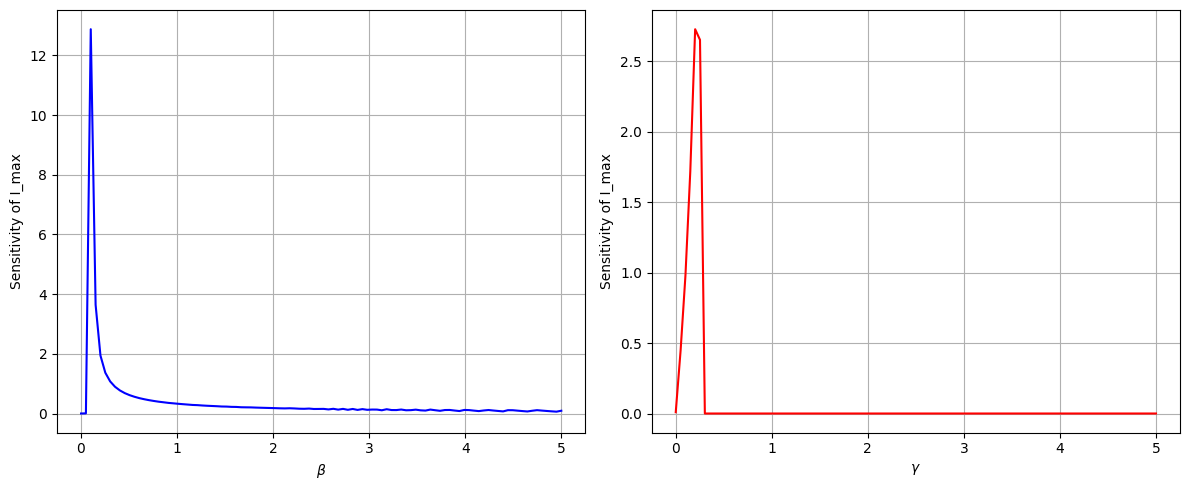

In [21]:
# parameters
beta_values = np.linspace(0.001, 5, 100)
gamma_values = np.linspace(0.001, 5, 100)
delta_p = beta_values[1]-beta_values[0]
gamma_fixed = 0.1
beta_fixed = 0.3

# sensitivities
sensitivity_beta = compute_sensitivity(beta_values, 'beta', delta_p, gamma_fixed, 'gamma')
sensitivity_gamma = compute_sensitivity(gamma_values, 'gamma', delta_p, beta_fixed, 'beta')

# plot results
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)# sensitivity with respect to beta
plt.plot(beta_values, sensitivity_beta, color='blue')
plt.xlabel(r'$\beta$')
plt.ylabel('Sensitivity of I_max')
plt.grid()
plt.subplot(1, 2, 2)# sensitivity with respect to gamma
plt.plot(gamma_values, sensitivity_gamma, color='red')
plt.xlabel(r'$\gamma$')
plt.ylabel('Sensitivity of I_max')
plt.grid()
plt.tight_layout()
plt.show()

## Heat maps

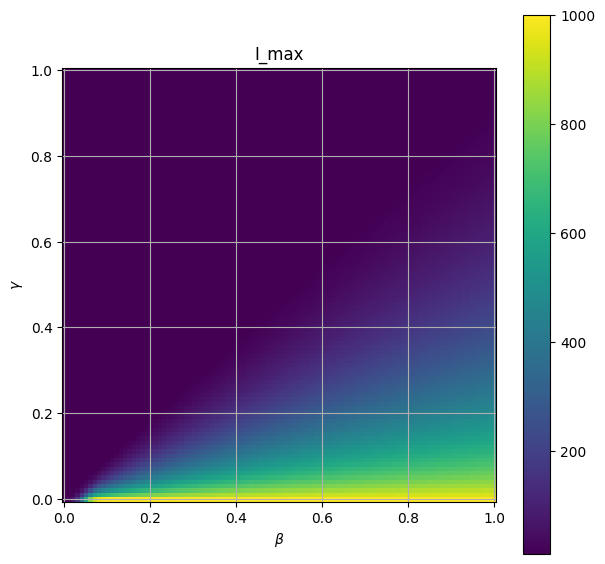

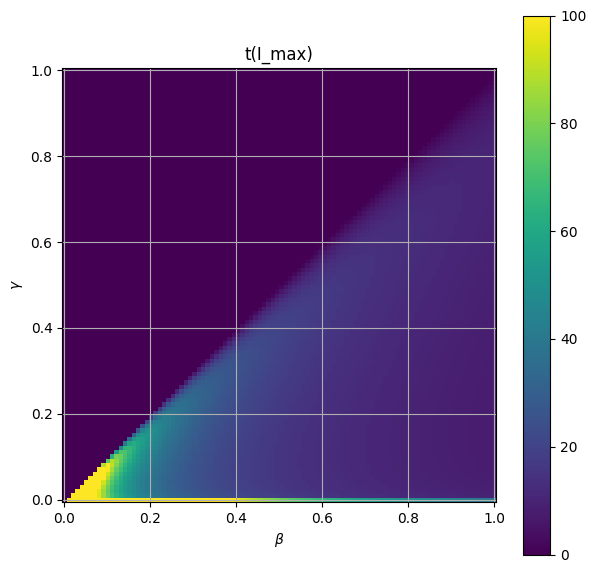

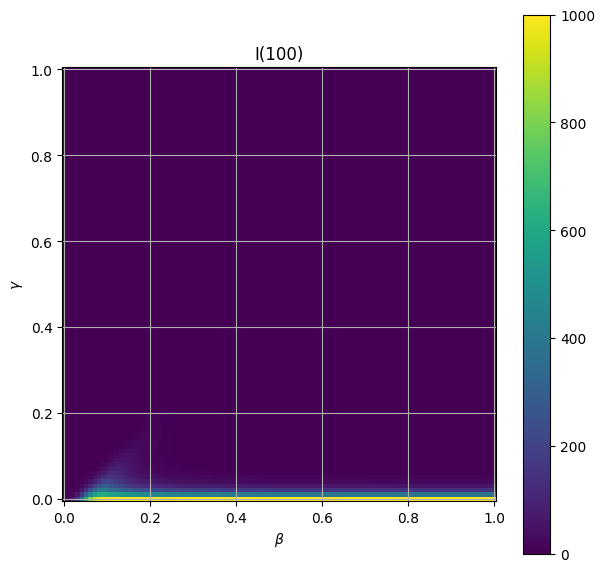

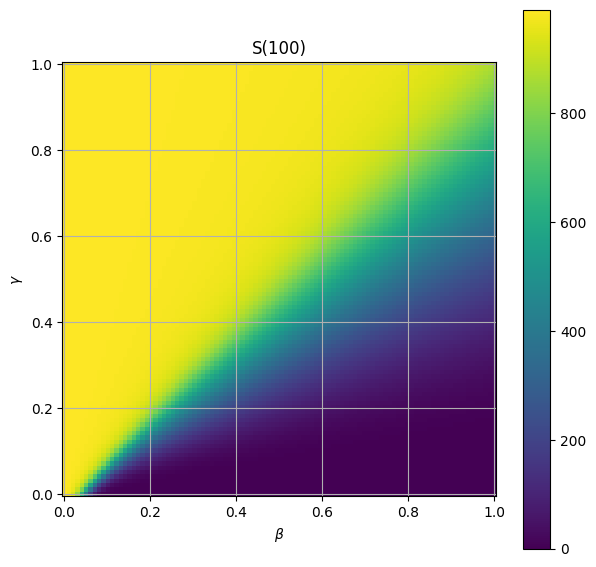

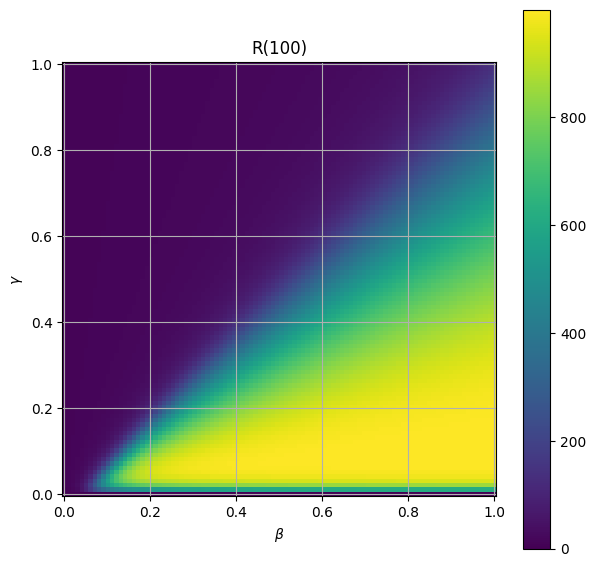

In [22]:
# grid of beta and gamma values
beta_values = np.linspace(0, 1, 100)
gamma_values = np.linspace(0, 1, 100)

# storage for the results
I_max_values = np.zeros((len(beta_values), len(gamma_values)))
t_max_I_values = np.zeros((len(beta_values), len(gamma_values)))
final_I_values = np.zeros((len(beta_values), len(gamma_values)))
final_S_values = np.zeros((len(beta_values), len(gamma_values)))
final_R_values = np.zeros((len(beta_values), len(gamma_values)))

S0, I0, R0 = 990, 10, 0  # initial conditions
t_max, dt = 100, 0.1  # simulation time and time step

# simulation
for i, beta in enumerate(beta_values):
    for j, gamma in enumerate(gamma_values):

        S, I, R, t = SIR_simulation(S0, I0, R0, beta, gamma, t_max, dt)

        I_max_values[i, j] = np.max(I)
        t_max_I_values[i, j] = t[np.argmax(I)]
        final_I_values[i, j] = I[-1]
        final_S_values[i, j] = S[-1]
        final_R_values[i, j] = R[-1]

# plot I_max vs beta and gamma
plt.figure(figsize = (7, 7))
plt.pcolormesh(beta_values, gamma_values, I_max_values.T, shading='auto')
plt.colorbar()
plt.xlabel(r'$\beta$')
plt.ylabel(r'$\gamma$')
plt.title('I_max')
plt.gca().set_aspect('equal', adjustable='box') # ensures square axes
plt.grid()
plt.show()

# plot t_max_I vs beta and gamma
plt.figure(figsize = (7, 7))
plt.pcolormesh(beta_values, gamma_values, t_max_I_values.T, shading='auto')
plt.colorbar()
plt.xlabel(r'$\beta$')
plt.ylabel(r'$\gamma$')
plt.title('t(I_max)')
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()
plt.show()

# plot final I vs beta and gamma
plt.figure(figsize = (7, 7))
plt.pcolormesh(beta_values, gamma_values, final_I_values.T, shading='auto')
plt.colorbar()
plt.xlabel(r'$\beta$')
plt.ylabel(r'$\gamma$')
plt.title('I(100)')
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()
plt.show()

# plot final S vs beta and gamma
plt.figure(figsize = (7, 7))
plt.pcolormesh(beta_values, gamma_values, final_S_values.T, shading='auto')
plt.colorbar()
plt.xlabel(r'$\beta$')
plt.ylabel(r'$\gamma$')
plt.title('S(100)')
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()
plt.show()

# plot final R vs beta and gamma
plt.figure(figsize = (7, 7))
plt.pcolormesh(beta_values, gamma_values, final_R_values.T, shading='auto')
plt.colorbar()
plt.xlabel(r'$\beta$')
plt.ylabel(r'$\gamma$')
plt.title('R(100)')
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()
plt.show()